In [37]:
#import required packages
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras import utils

In [5]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


(28, 28)

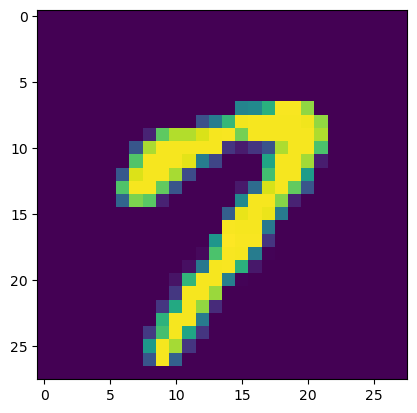

In [7]:
#let us visualize the data.

import matplotlib.pyplot as plt
num = 15
plt.imshow(X_train[num])
X_train[num].shape

In [9]:
# we can see the above output as 7 that will be present in the y_train[15]
print(y_train[num])

7


5


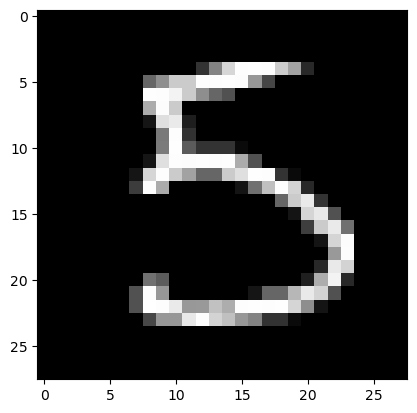

In [11]:
# same for the test images it will be used for the validation
plt.imshow(X_test[num], cmap=plt.get_cmap('gray'))
print(y_test[num])
#so we have the input image data with the corresponding output data

In [13]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
#reshaping every images to 28x28x1 width, height= 28, 28 then 1 represent 1 channel if it is 3 then it will a color image rgb

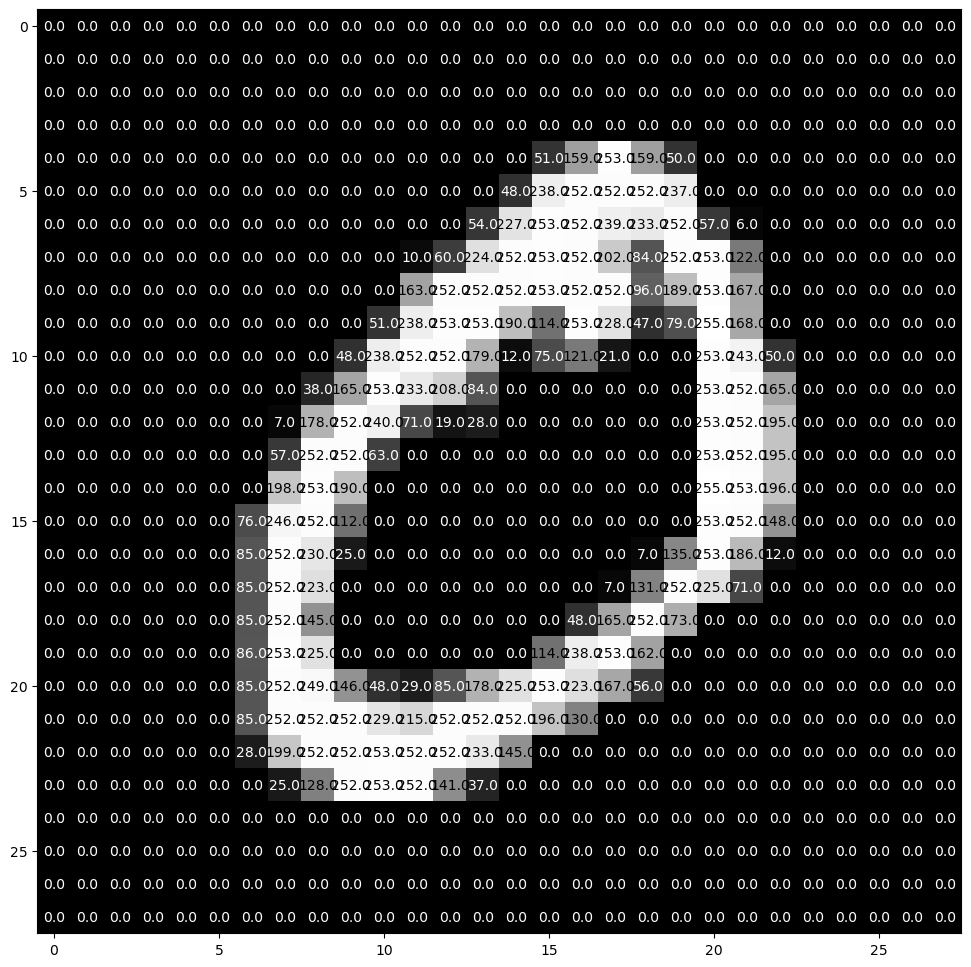

In [15]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[1].reshape(28,28), ax)
#now you can see the images with pixel ranging from 0 to 1 since we divided by 255.0

In [17]:
#let us check
X_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [19]:
print('shape i.e the dimension of the images', X_train[0].shape)
# 28 rows 28 columns in the data in range of pixel value 0-255

shape i.e the dimension of the images (28, 28, 1)


In [21]:
# it will be easily enhance the prediction through normalization by reducing the large values

X_train = X_train / 255
X_test = X_test / 255

In [23]:
print(X_train[0])
# now it will be in range of 0-255

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [43]:
# defining CNN Model
from keras.layers import MaxPool2D
def cnn():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [45]:
# build the model
model = cnn()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

NameError: name 'MaxPooling2D' is not defined

In [49]:
# defining CNN Model
def cnn():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [51]:
# build the model
model = cnn()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

NameError: name 'num_classes' is not defined

In [53]:
#let us do one hot encoding
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [55]:
#now 

print(y_train[15])
# 1 in the 7th index

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [57]:
#total number of classes will be 10 i.e digit 0-9
num_classes = 10

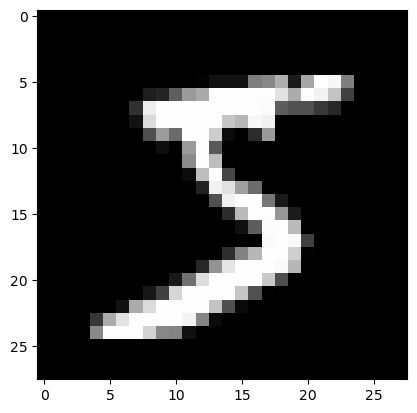

In [59]:
plt.imshow(X_train[0][:,:,0], cmap=plt.get_cmap('gray'))

In [61]:
# defining CNN Model
def cnn():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [63]:
# build the model
model = cnn()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 9s - 31ms/step - accuracy: 0.9268 - loss: 0.2574 - val_accuracy: 0.9748 - val_loss: 0.0829
Epoch 2/10
300/300 - 8s - 26ms/step - accuracy: 0.9763 - loss: 0.0775 - val_accuracy: 0.9830 - val_loss: 0.0561
Epoch 3/10
300/300 - 7s - 24ms/step - accuracy: 0.9831 - loss: 0.0550 - val_accuracy: 0.9857 - val_loss: 0.0443
Epoch 4/10
300/300 - 7s - 23ms/step - accuracy: 0.9871 - loss: 0.0430 - val_accuracy: 0.9849 - val_loss: 0.0426
Epoch 5/10
300/300 - 7s - 24ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9871 - val_loss: 0.0402
Epoch 6/10
300/300 - 8s - 27ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9896 - val_loss: 0.0319
Epoch 7/10
300/300 - 8s - 26ms/step - accuracy: 0.9919 - loss: 0.0252 - val_accuracy: 0.9872 - val_loss: 0.0345
Epoch 8/10
300/300 - 8s - 26ms/step - accuracy: 0.9932 - loss: 0.0213 - val_accuracy: 0.9893 - val_loss: 0.0303
Epoch 9/10
300/300 - 7s - 24ms/step - accuracy: 0.9949 - loss: 0.0168 - val_accuracy: 0.9884 - val_loss:

In [65]:
scores = model.evaluate(X_test, y_test, verbose=0)
scores

[0.03159884363412857, 0.9901000261306763]

In [67]:
model.predict(X_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[6.2390387e-10, 6.5356534e-09, 3.1867380e-08, 9.5542350e-07,
        7.2042116e-12, 3.7759845e-10, 2.4527599e-16, 9.9999762e-01,
        7.9945561e-09, 1.4099199e-06]], dtype=float32)

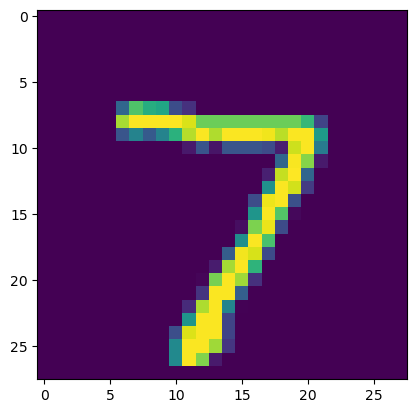

In [69]:
plt.imshow(X_test[0][:,:,0])

In [71]:
def expected_result(y_data):
  for i in range(10): 
    if(y_data[i]):
      print(i)
      break

In [73]:
def predicted_result(pred_Xtrain, index):
  ans = pred_Xtrain[index].argsort()[-8:][::-1]  #sorting in descending
  print(ans[0])

In [75]:
pred_Xtest = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [77]:
index = 20
predicted_result(pred_Xtest, index)

9


In [79]:
expected_result(y_test[index])

9


In [85]:
model.save('C:/Users/User/Digit2/datadigitrecognition.h5')
#save the model in the drive and download it for the deployment

In [87]:
test1 = X_test[0]

In [89]:
test1.shape

(28, 28, 1)

In [91]:
X_test.shape

(10000, 28, 28, 1)

In [93]:
test1 = test1.reshape(1, 28, 28, 1).astype('float32')
test1.shape

(1, 28, 28, 1)

In [95]:
model.predict(test1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[6.2390387e-10, 6.5356534e-09, 3.1867380e-08, 9.5542350e-07,
        7.2042116e-12, 3.7759845e-10, 2.4527599e-16, 9.9999762e-01,
        7.9945561e-09, 1.4099199e-06]], dtype=float32)

In [97]:
type(test1)

numpy.ndarray

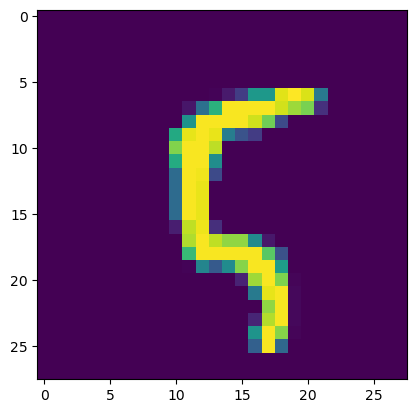

In [99]:
for i in range(0, 10):
  plt.imshow(X_train[100][:, :, 0])
  